# Boise Weather Patterns Forecasting

## Introduction
Accurate weather prediction is a critical component of modern society, influencing a wide range of sectors from agriculture and aviation to disaster management and everyday life activities. In Boise, a city known for its dynamic weather patterns that span hot summers and cold winters, the ability to predict weather accurately is not just a convenience—it's a necessity for planning and preparedness.

The advent of machine learning has opened new vistas in meteorological science, offering the ability to analyze vast datasets and uncover patterns that traditional models might miss. This project taps into this innovative technology, applying three different machine learning techniques: Linear Regression, Ridge Regression, and Neural Networks, to forecast weather conditions in Boise. Each of these methods offers unique strengths in handling complex, non-linear data inherent in weather patterns, providing a comprehensive approach to predicting temperature variations with high accuracy.

This study is structured to not only apply these techniques to historical weather data from Boise but also to critically compare their performance, shedding light on which methods are most effective under specific weather conditions prevalent in the region. By focusing on a suite of weather parameters—precipitation, snow, snow depth, maximum and minimum temperatures—the project aims to provide a detailed analysis of predictive capabilities and offer insights that could enhance short-term weather forecasting in Boise.

In doing so, the project will contribute to the ongoing efforts to improve local weather prediction models, providing valuable insights that could help improve the accuracy of weather forecasts used by local farmers for planting and harvesting, by city planners for urban development, and by emergency response teams managing weather-related disasters.

With this backdrop, the following sections will detail the data collection methods, the machine learning algorithms applied, the results of the study, and the implications of these findings for future weather prediction efforts in Boise.

## Data Loading and Description
### Dataset Overview
This project utilizes weather data from January 1st 1970 to March 31st, 2024, collected at the Boise Air Terminal, ID, US. The data is sourced from The Global Historical Climatology Network-Daily (GHCNd), which is an extensive integrated database of daily climate summaries from land surface stations across the globe.

### Source
The GHCNd is managed and disseminated by the National Centers for Environmental Information (NCEI), a part of NOAA. The dataset represents a comprehensive collection of daily climate records from numerous sources worldwide, which have been integrated and subjected to a standardized suite of quality assurance reviews to ensure accuracy and consistency. More details about the dataset and its management can be accessed on the NCEI website.

### Data Features
The dataset contains various climatological variables, each significant for understanding weather patterns and aiding in accurate weather forecasting. The variables included in this study are:

- PRCP: Precipitation, recorded either in millimeters or inches (converted to hundredths on the Daily Form pdf), indicating the amount of precipitation that fell during a particular day.
- SNOW: Snowfall amount, recorded either in millimeters or inches (converted to tenths on the Daily Form pdf), reflecting the daily total snowfall.
- SNWD: Snow depth, indicating the depth of snow on the ground, recorded either in millimeters or inches.
- TMAX: Maximum temperature of the day, recorded in either Fahrenheit or Celsius (converted to tenths on the Daily Form pdf).
- TMIN: Minimum temperature of the day, recorded similarly to TMAX.
### Objective
The primary objective of loading this data is to prepare it for subsequent analysis using machine learning techniques aimed at predicting future weather conditions, specifically focusing on temperature predictions. The analysis will help in understanding how different weather variables interact and affect the daily temperature outcomes in Boise.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.dates as mdates
from sklearn.model_selection import GridSearchCV

/tmp/ipykernel_737552/779745771.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-22 22:04:33.018954: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 22:04:33.040596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AV

Loading the Data

In [2]:
# Loading Dataset
boise_weather = pd.read_csv("/home/asfandyarkhan/Downloads/Boise1970-Mar2024.csv", index_col="DATE")
boise_weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024131,"BOISE AIR TERMINAL, ID US",10.0,0.0,NaN,NaN,1030.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00024131,"BOISE AIR TERMINAL, ID US",60.0,50.0,NaN,NaN,1354.0,0.00,75.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00024131,"BOISE AIR TERMINAL, ID US",20.0,0.0,NaN,NaN,1012.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00024131,"BOISE AIR TERMINAL, ID US",100.0,100.0,NaN,NaN,330.0,0.07,0.0,1.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00024131,"BOISE AIR TERMINAL, ID US",80.0,90.0,NaN,NaN,1448.0,0.00,70.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,12.30,NaN,NaN,0.08,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,7.16,NaN,NaN,0.55,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-29,USW00024131,"BOISE AIR TERMINAL, ID US",NaN,NaN,6.49,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculates the proportion of missing data in each column of the DataFrame.

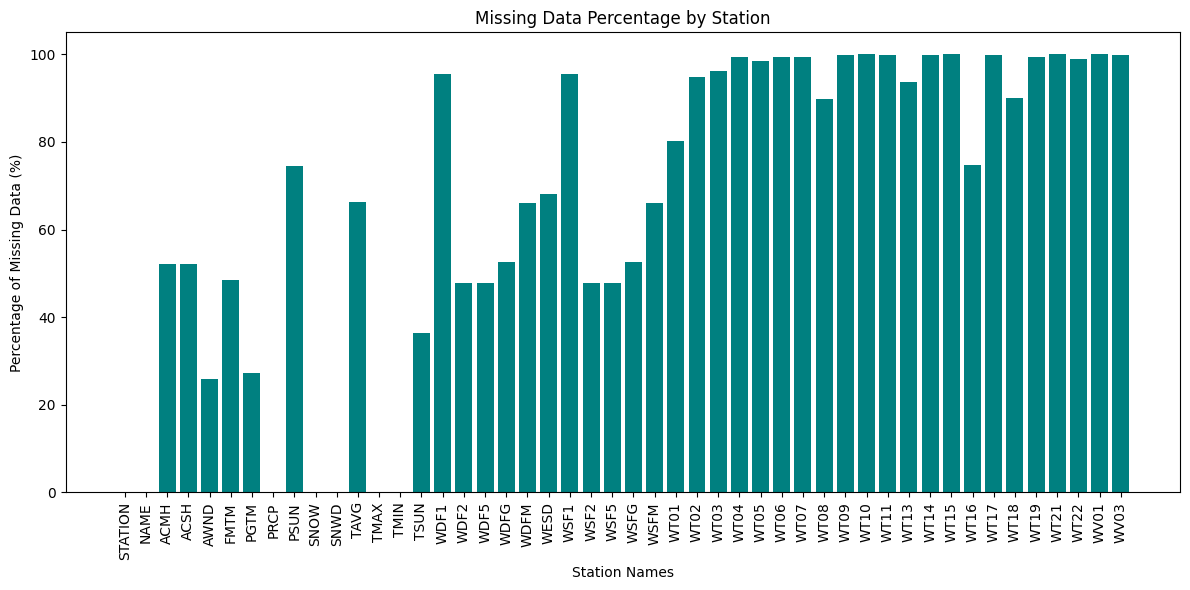

In [3]:
missing_data_percent = boise_weather.apply(pd.isnull).sum() / boise_weather.shape[0] * 100
plt.figure(figsize=(12, 6))
plt.bar(missing_data_percent.index, missing_data_percent.values, color='teal')
plt.xlabel('Station Names')
plt.ylabel('Percentage of Missing Data (%)') 
plt.title('Missing Data Percentage by Station')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
boise_core_weather = boise_weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
boise_core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
boise_core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-01-01,0.00,0.0,0.0,30,13
1970-01-02,0.00,0.0,0.0,33,17
1970-01-03,0.00,0.0,0.0,34,17
1970-01-04,0.07,1.4,0.0,26,19
1970-01-05,0.00,0.0,1.0,27,12
...,...,...,...,...,...
2024-03-27,0.08,0.0,0.0,57,37
2024-03-28,0.55,0.0,0.0,52,37
2024-03-29,0.00,0.0,0.0,58,35


Calculate the number of missing values in each specified column

In [5]:
missing_counts = boise_core_weather[["precip", "snow",  "temp_max", "snow_depth", "temp_min"]].isnull().sum()
print(f"The number of rows with missing data is: {missing_counts}")

The number of rows with missing data is: precip        0
snow          0
temp_max      0
snow_depth    0
temp_min      0
dtype: int64


Boxplots for a comprehensive graphical summary of weather extremes and variability.

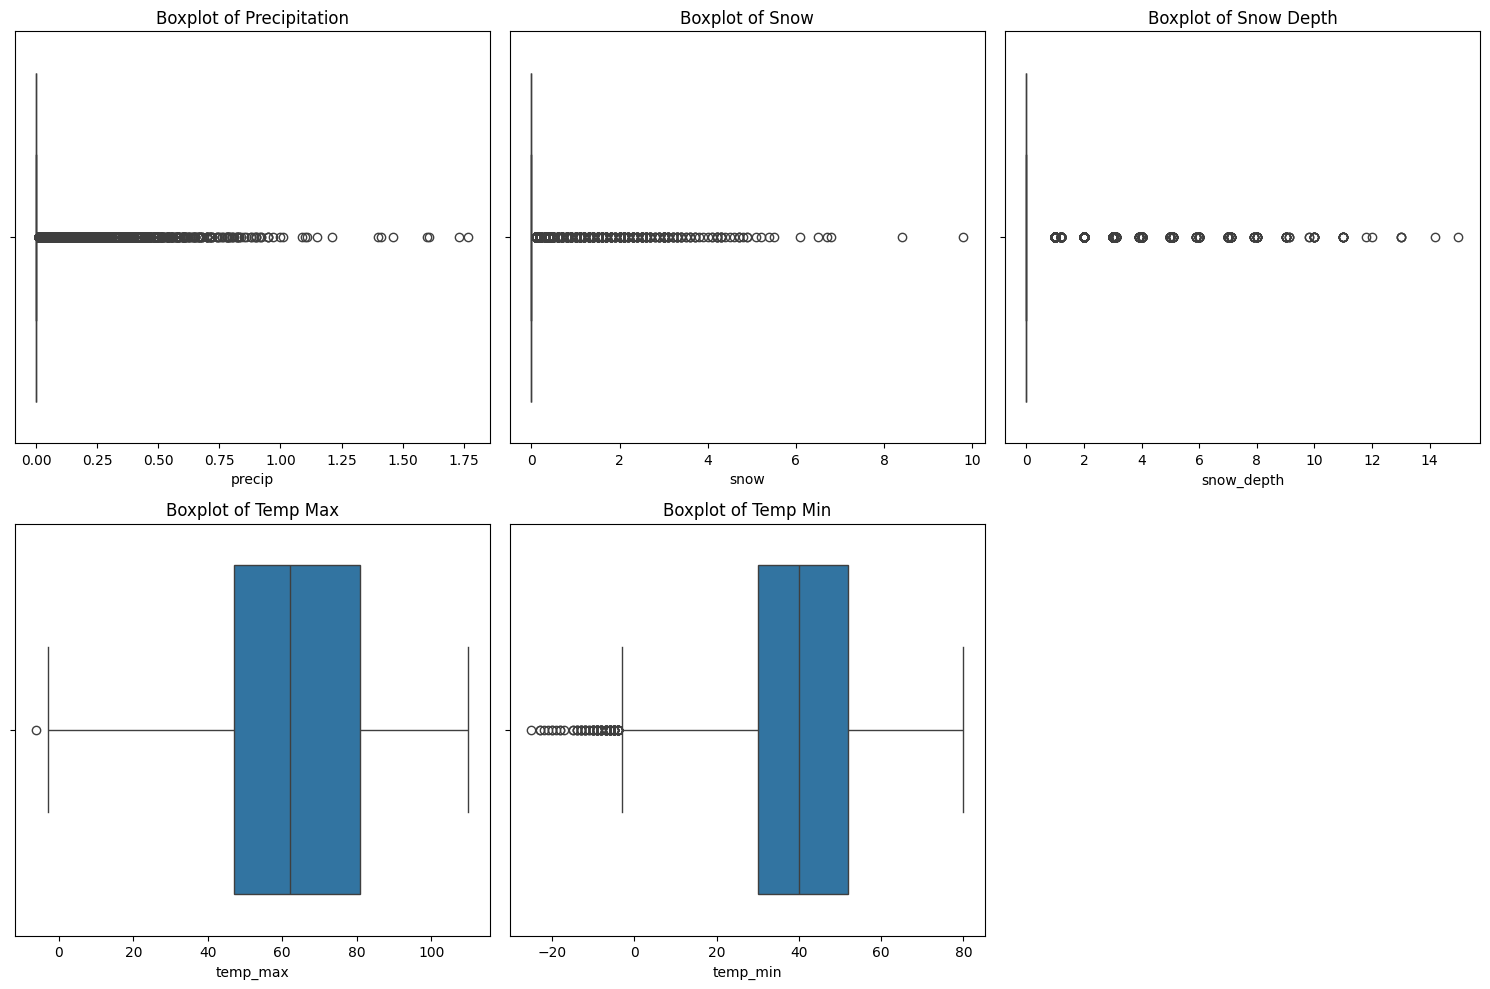

In [6]:
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary

# Boxplot for 'precip'
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
sns.boxplot(data=boise_core_weather, x='precip')
plt.title('Boxplot of Precipitation')

# Boxplot for 'snow'
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
sns.boxplot(data=boise_core_weather, x='snow')
plt.title('Boxplot of Snow')

# Boxplot for 'snow_depth'
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
sns.boxplot(data=boise_core_weather, x='snow_depth')
plt.title('Boxplot of Snow Depth')

# Boxplot for 'temp_max'
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 4
sns.boxplot(data=boise_core_weather, x='temp_max')
plt.title('Boxplot of Temp Max')

# Boxplot for 'temp_min'
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 5
sns.boxplot(data=boise_core_weather, x='temp_min')
plt.title('Boxplot of Temp Min')

plt.tight_layout()  # Adjust subplots to fit into figure area nicely
plt.show()

This function is designed to remove outliers from specified columns of a dataset, using the Interquartile Range (IQR) method while preserving the last 20 entries untouched for testing. It separates training data for outlier removal, ensuring the integrity of the test set, and reports the count of outliers removed, which can be critical for maintaining dataset quality and model accuracy.

In [7]:
def remove_outliers(df, column, multiplier=1.5):
    # Exclude the last 20 days for outlier detection and removal
    training_data = df.iloc[:-20]
    test_data = df.iloc[-20:]
    
    Q1 = training_data[column].quantile(0.25)
    Q3 = training_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Apply the filter on the training part only
    filtered_training_data = training_data[(training_data[column] >= lower_bound) & (training_data[column] <= upper_bound)]
    
    # Combine back the untouched test data
    combined_data = pd.concat([filtered_training_data, test_data])

    initial_row_count = training_data.shape[0]
    final_row_count = filtered_training_data.shape[0]
    print(f"Outliers removed from {column}: {initial_row_count - final_row_count}")
    print(f"Rows remaining in training set: {final_row_count}")

    # Return both the combined data and the number of outliers removed
    return combined_data, initial_row_count - final_row_count

# Apply to the dataset
columns_to_check = ["temp_max", "temp_min"]
filtered_data = boise_core_weather.copy()
total_outliers = 0

for column in columns_to_check:
    filtered_data, num_outliers_removed = remove_outliers(filtered_data, column)
    total_outliers += num_outliers_removed

print(f"Total outliers removed across columns: {total_outliers}")

Outliers removed from temp_max: 1
Rows remaining in training set: 19793
Outliers removed from temp_min: 85
Rows remaining in training set: 19708
Total outliers removed across columns: 86


Removing outliers for temp_max and temp_min only.

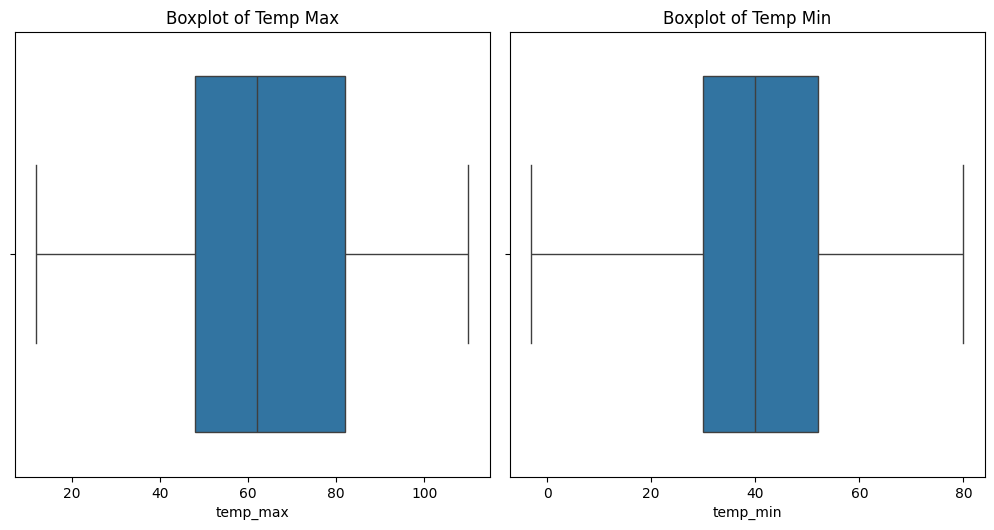

In [8]:
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary
# Boxplot for 'temp_max'
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 4
sns.boxplot(data=filtered_data, x='temp_max')
plt.title('Boxplot of Temp Max')

# Boxplot for 'temp_min'
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 5
sns.boxplot(data=filtered_data, x='temp_min')
plt.title('Boxplot of Temp Min')

plt.tight_layout()  # Adjust subplots to fit into figure area nicely
plt.show()

Re-checking the number of missing values in each specified column


In [9]:
missing_counts = filtered_data[["precip", "snow",  "temp_max", "snow_depth", "temp_min"]].isnull().sum()
# Print the count of missing values
print(f"The number of rows with missing data is: {missing_counts}")

The number of rows with missing data is: precip        0
snow          0
temp_max      0
snow_depth    0
temp_min      0
dtype: int64


This code provides a visual exploration of weather data through various plots:

A **pair plot** provides insights into the pairwise relationships between all continuous variables in the dataset, excluding the target. This plot helps identify correlations and patterns.
A **time series** plot is generated for each variable, plotting them over time to analyze trends and seasonal behavior, and axis labels for clarity.
A two-panel figure consists of a **heatmap** of the correlation matrix to visualize the strength and direction of relationships between variables, and a **time series plot** specifically for temperatures, comparing maximum and minimum values over time with clear legends and grid lines for reference.

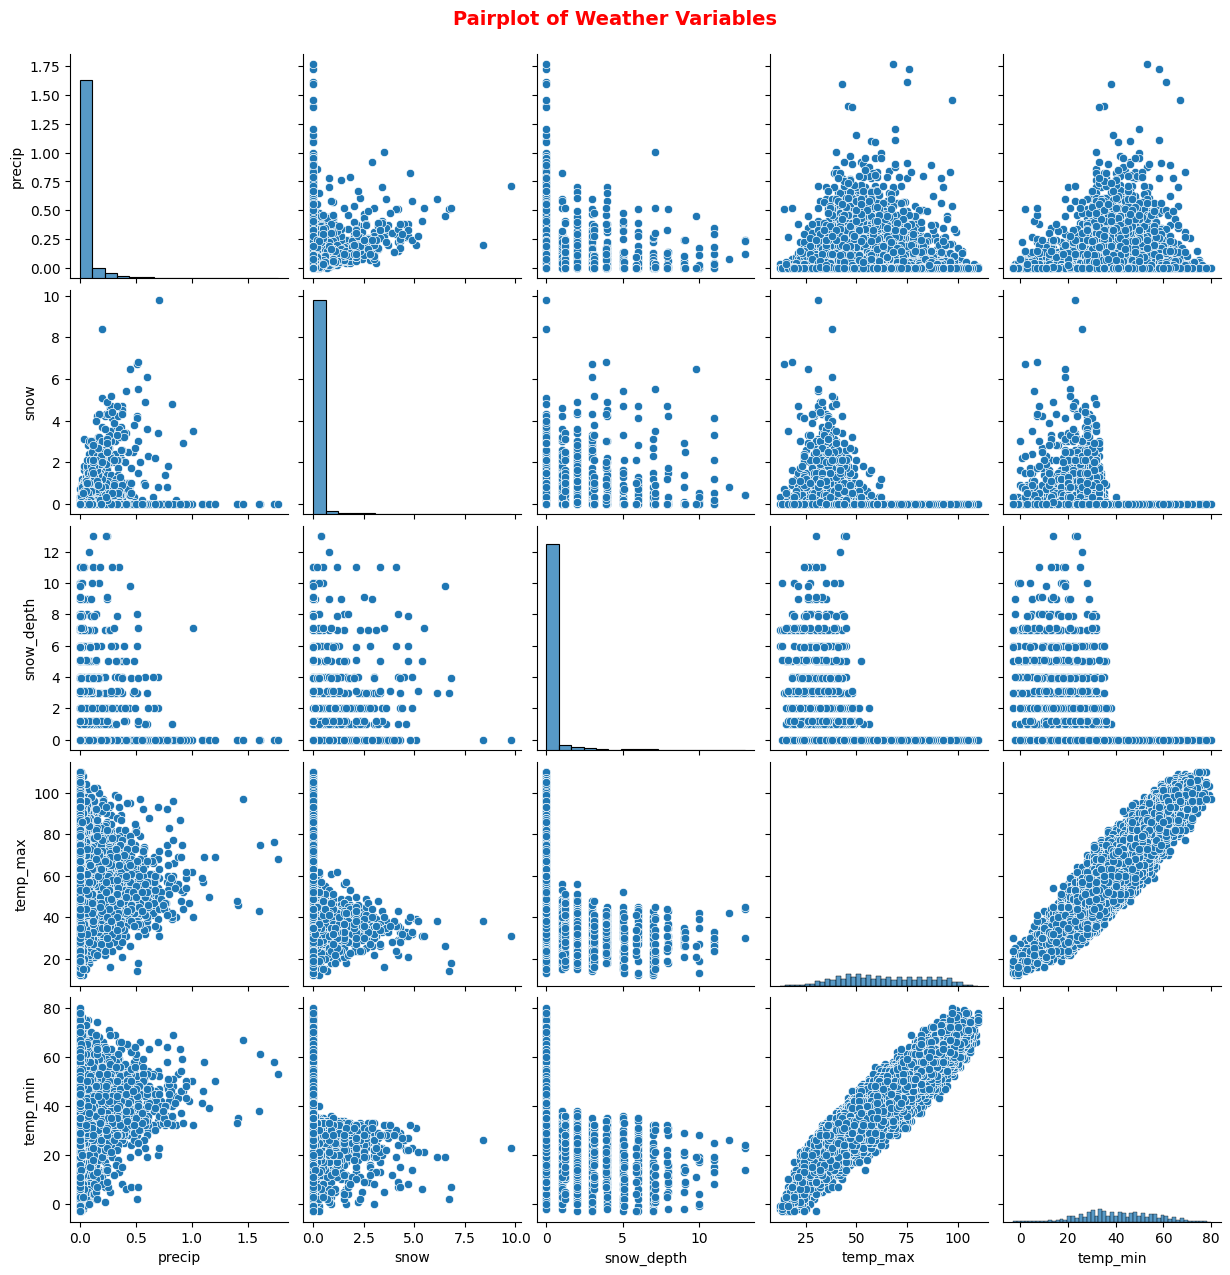

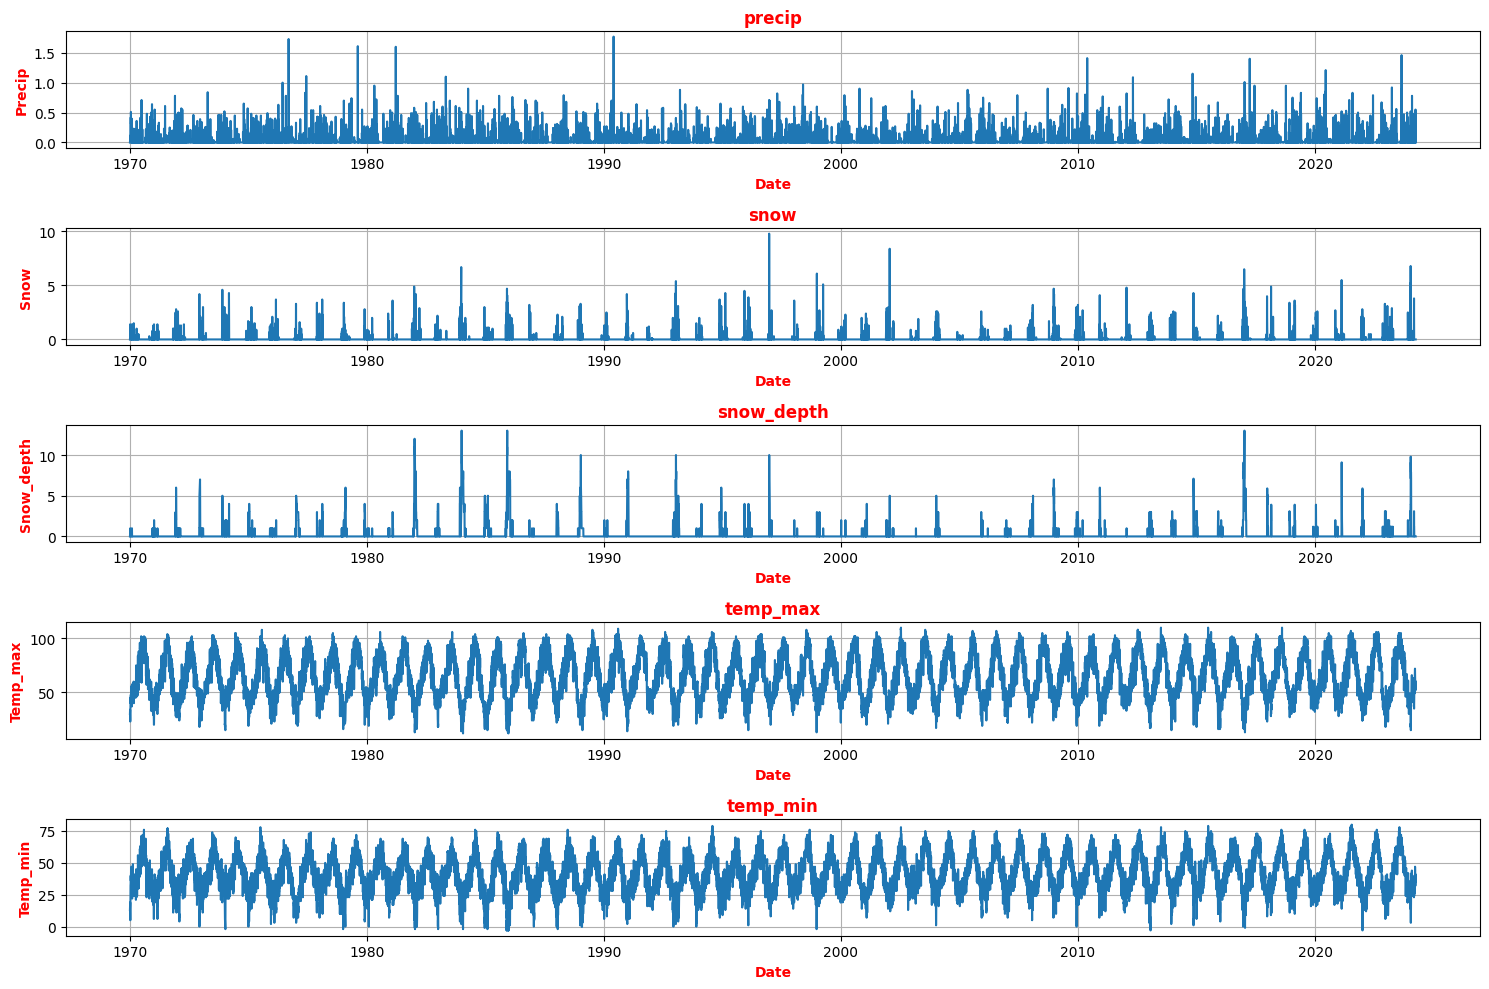

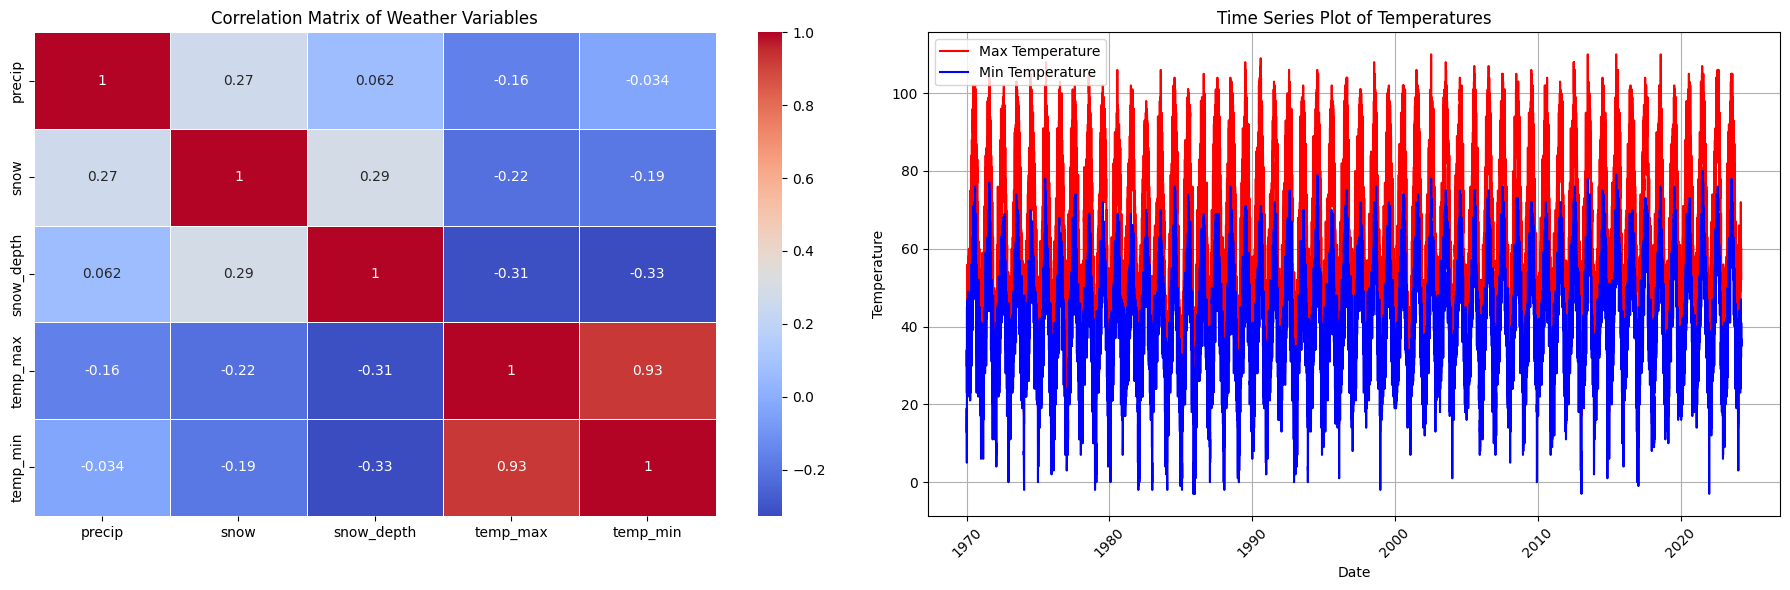

In [13]:
data_for_visualization = filtered_data.copy()
# Pair plot to explore relationships between continuous variables
sns.pairplot(data_for_visualization)
plt.suptitle("Pairplot of Weather Variables", y=1.02, fontsize=14, color='red', weight='bold')  # Bold and red title
plt.show()

# Time series plot for each variable over time
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_for_visualization.columns, 1):
    plt.subplot(len(data_for_visualization.columns), 1, i)
    plt.plot(data_for_visualization.index, data_for_visualization[column])
    plt.title(column, color='red', weight='bold')  # Bold and red title for each subplot
    plt.xlabel('Date', color='red', weight='bold')  # Bold and red X-axis label
    plt.ylabel(column.capitalize(), color='red', weight='bold')  # Bold and red Y-axis label
    plt.grid(True)
plt.tight_layout()
plt.show()

# Create a figure and a set of subplots
plt.figure(figsize=(18, 6))

# Plot 1: Correlation matrix heatmap
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
correlation_matrix = data_for_visualization.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables")

# Plot 2: Time Series Plot of Temperatures
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(data_for_visualization.index, data_for_visualization['temp_max'], label='Max Temperature', color='red')
plt.plot(data_for_visualization.index, data_for_visualization['temp_min'], label='Min Temperature', color='blue')
plt.title("Time Series Plot of Temperatures")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

Transforms the index of the core_weather DataFrame into a DateTimeIndex

In [11]:
filtered_data.index = pd.to_datetime(filtered_data.index)
filtered_data.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=19728)

Setting up the **"target"** column in this way, each row in the DataFrame can be used to train a model where the features are the current day's weather measurements, and the target is the next day's maximum temperature.

In [16]:

filtered_data["target"] = filtered_data.shift(-1)["temp_max"]
# modifies the core_weather DataFrame by removing the last row
filtered_data = filtered_data.iloc[:-1,:].copy()
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min  target
DATE                                                            
1970-01-01    0.00   0.0         0.0        30        13    33.0
1970-01-02    0.00   0.0         0.0        33        17    34.0
1970-01-03    0.00   0.0         0.0        34        17    26.0
1970-01-04    0.07   1.4         0.0        26        19    27.0
1970-01-05    0.00   0.0         1.0        27        12    23.0
...            ...   ...         ...       ...       ...     ...
2024-03-25    0.00   0.0         0.0        53        33    53.0
2024-03-26    0.05   0.0         0.0        53        32    57.0
2024-03-27    0.08   0.0         0.0        57        37    52.0
2024-03-28    0.55   0.0         0.0        52        37    58.0
2024-03-29    0.00   0.0         0.0        58        35    60.0

[19726 rows x 6 columns]


Three distinct machine learning (ML) techniques have been explored to predict temperatures, assessing their performance through repeated experimentation.
##### Linear Regression: 
A fundamental statistical approach for modeling the relationship between dependent and independent variables by fitting a linear equation to observed data. Here, it's applied to predict temperature based on different features. Its simplicity is advantageous for interpretability, but it may not capture more complex relationships.
##### Ridge Regression: 
An extension of linear regression that includes regularization (L2 penalty). The alpha parameter controls the strength of the penalty, which helps prevent overfitting and manage multicollinearity. A grid search is conducted to find the **optimal alpha value**, enhancing model generalization.
##### Neural Network (NN): 
A deep learning model consisting of densely connected layers, designed to capture complex patterns in data. It includes layers with batch normalization and dropout to improve training dynamics and reduce overfitting, respectively. The NN is configured for regression, targeting single-value continuous output - the next day's temperature.

Best alpha value for iteration 1: 0.6601449092734883
206/206 [==============================] - 0s 329us/step
Best alpha value for iteration 2: 0.41613905533166984
206/206 [==============================] - 0s 330us/step
Best alpha value for iteration 3: 0.41613905533166984
206/206 [==============================] - 0s 307us/step
Best alpha value for iteration 4: 0.18134978041964953
206/206 [==============================] - 0s 316us/step
Best alpha value for iteration 5: 0.1507845045861048
206/206 [==============================] - 0s 310us/step
MSE - Linear: 40.92, Ridge: 40.92, NN: 43.58
MAE - Linear: 4.97, Ridge: 4.97, NN: 5.28


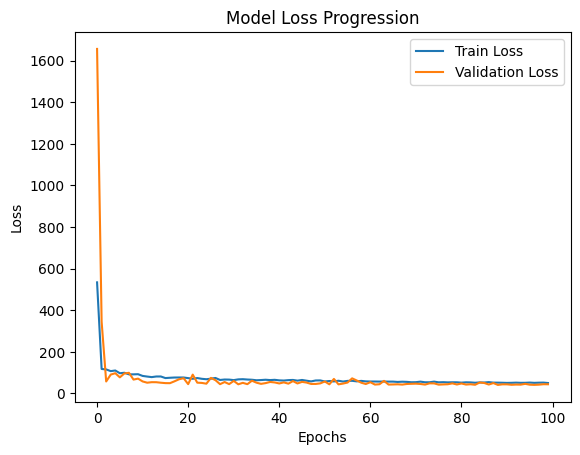

In [18]:
# Define the number of repetitions
n_repeats = 5  # For demonstration, let's just do one iteration

# Data Preparation
X = filtered_data.drop('target', axis=1)  # All features except target 
#X = filtered_data[['temp_max', 'temp_min']]  # Only temperature features

y = filtered_data['target']

# Metrics storage
metrics = {}

for i in range(n_repeats):
    # Random state for reproducibility on the last iteration
    random_state = np.random.randint(10000) if i < n_repeats - 1 else 42
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=2/3, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_pred_lr = linear_model.predict(X_test_scaled)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)

    # Ridge Regression
        # Ridge Regression with Grid Search for Alpha
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ])
    alpha_values = np.logspace(-10, 10, 500)  # Adjust the range based on your specific needs
    param_grid = {'ridge__alpha': alpha_values}
    grid_search = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5)
    grid_search.fit(X_train, y_train)
    best_alpha = grid_search.best_params_['ridge__alpha']
    print(f"Best alpha value for iteration {i+1}: {best_alpha}")

    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val))
    y_pred_nn = nn_model.predict(X_test_scaled).flatten()
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    mae_nn = mean_absolute_error(y_test, y_pred_nn)

    # Store metrics
    metrics['MSE'] = [mse_lr, mse_ridge, mse_nn]
    metrics['MAE'] = [mae_lr, mae_ridge, mae_nn]

    # Prepare results for the last iteration
    if i == n_repeats - 1:
        results_df = pd.DataFrame({
            'Actual Temperature': y_test,
            'Linear Regression': y_pred_lr,
            'Ridge Regression': y_pred_ridge,
            'Neural Network': y_pred_nn
        }, index=X_test.index).sort_index()

    cutoff_year = pd.to_datetime("today").year - 5

# Print metrics
print("MSE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(*metrics['MSE']))
print("MAE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(*metrics['MAE']))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Best alpha for ridge regression = **0.1507845045861048**

Features considered: **temp_max**, **temp_min**

Mean Absolute Error (MAE):

**Linear**: **4.97**, **Ridge**: **4.97**, **NN**: **5.01**

Features considered: **precip**,  **snow**,  **snow_depth**, **temp_max**, **temp_min**

Mean Absolute Error (MAE):

**Linear**: **4.97**, **Ridge**: **4.97**, **NN**: **5.25**

In [21]:
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min  target
DATE                                                            
1970-01-01    0.00   0.0         0.0        30        13    33.0
1970-01-02    0.00   0.0         0.0        33        17    34.0
1970-01-03    0.00   0.0         0.0        34        17    26.0
1970-01-04    0.07   1.4         0.0        26        19    27.0
1970-01-05    0.00   0.0         1.0        27        12    23.0
...            ...   ...         ...       ...       ...     ...
2024-03-25    0.00   0.0         0.0        53        33    53.0
2024-03-26    0.05   0.0         0.0        53        32    57.0
2024-03-27    0.08   0.0         0.0        57        37    52.0
2024-03-28    0.55   0.0         0.0        52        37    58.0
2024-03-29    0.00   0.0         0.0        58        35    60.0

[19726 rows x 6 columns]


Plotting comparision of actual and predicted temperatures for last 5 years

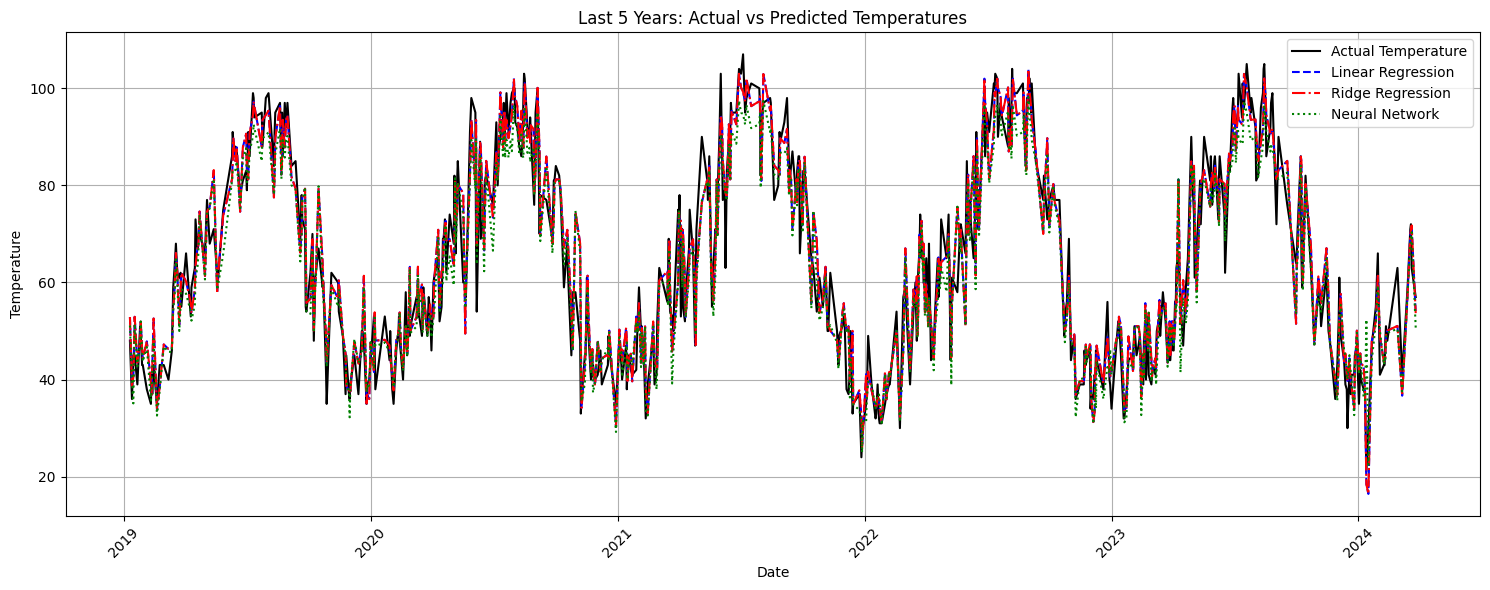

In [35]:
# Plotting
plt.figure(figsize=(15, 6))
last_5_years_df = results_df[results_df.index.year >= cutoff_year]
plt.plot(last_5_years_df.index, last_5_years_df['Actual Temperature'], label='Actual Temperature', color='black')
plt.plot(last_5_years_df.index, last_5_years_df['Linear Regression'], label='Linear Regression', color='blue', linestyle='--')
plt.plot(last_5_years_df.index, last_5_years_df['Ridge Regression'], label='Ridge Regression', color='red', linestyle='-.')
plt.plot(last_5_years_df.index, last_5_years_df['Neural Network'], label='Neural Network', color='green', linestyle=':')
plt.title('Last 5 Years: Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 9ms/step


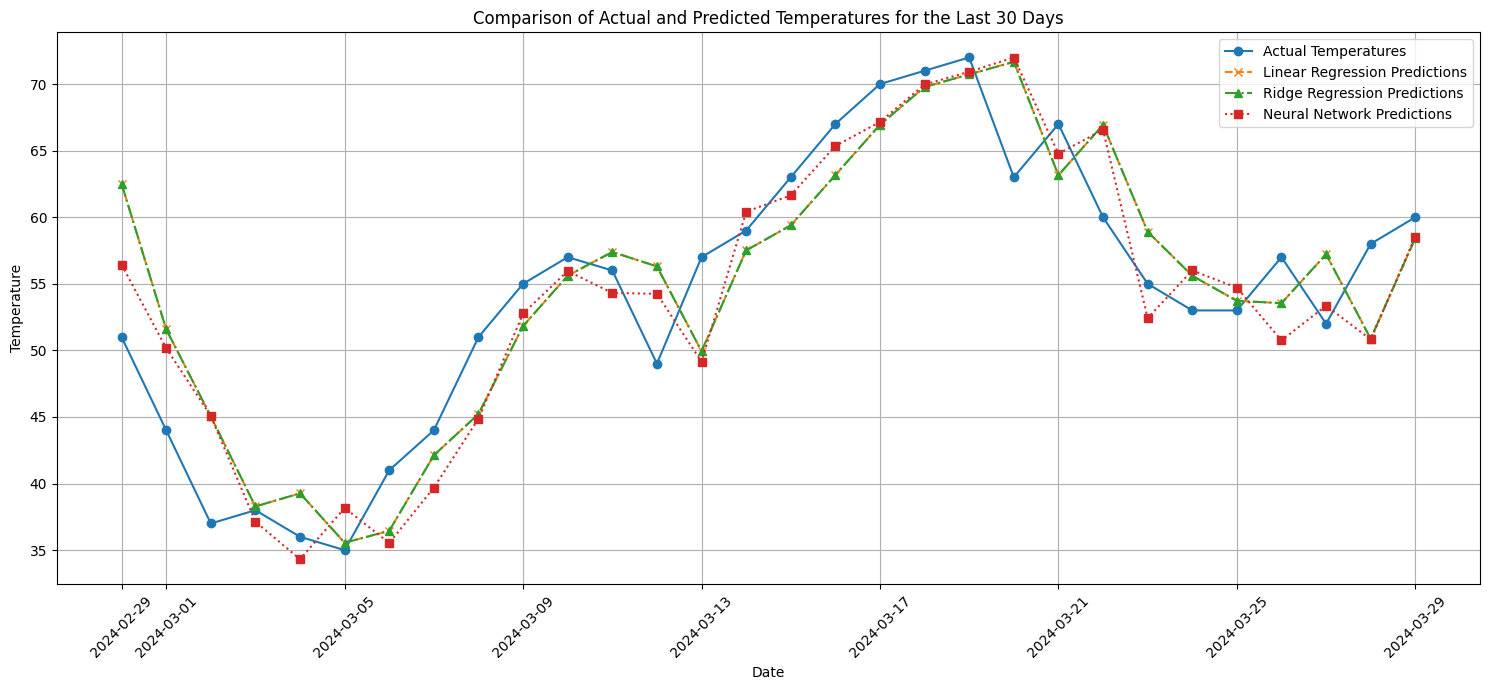

In [38]:
# Define the number of repetitions for averaging results
n_repeats = 5

# Data Preparation
number_of_days = 30  # Number of days we want to compare with the actual data for visulizaiton
# Exclude the last days for actual final comparison
X = filtered_data.drop('target', axis=1).iloc[:-number_of_days]  # Features without the last days
y = filtered_data['target'].iloc[:-number_of_days]  # Target without the last days

# Last days data for final comparison
X_last_30 = filtered_data.drop('target', axis=1).tail(number_of_days)
y_last_30 = filtered_data['target'].tail(number_of_days)

# Metrics storage
metrics = []

for i in range(n_repeats):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(1000))
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_last_20_scaled = scaler.transform(X_last_30)  # Scale last days for final comparison

    # Initialize models
    linear_model = LinearRegression()
    ridge_model = Ridge(alpha=0.1507845045861048)  
    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train models
    linear_model.fit(X_train_scaled, y_train)
    ridge_model.fit(X_train_scaled, y_train)
    nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

    # Predict on test set
    y_pred_linear = linear_model.predict(X_test_scaled)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    y_pred_nn = nn_model.predict(X_test_scaled).flatten()

    # Store metrics for this iteration
    mse_lr = mean_squared_error(y_test, y_pred_linear)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    metrics.append((mse_lr, mse_ridge, mse_nn))

# After last training iteration, making predictions on the last days
y_pred_linear_last_30 = linear_model.predict(X_last_20_scaled)
y_pred_ridge_last_30 = ridge_model.predict(X_last_20_scaled)
y_pred_nn_last_30 = nn_model.predict(X_last_20_scaled).flatten()

# Calculate metrics for the last 20 days
mae_lr_last_20 = mean_absolute_error(y_last_30, y_pred_linear_last_30)
mae_ridge_last_20 = mean_absolute_error(y_last_30, y_pred_ridge_last_30)
mae_nn = mean_absolute_error(y_last_30, y_pred_nn_last_30)

# Print metrics
#print(f"MAE for the last 30 days - Linear: {mae_lr_last_20:.2f}, Ridge: {mae_ridge_last_20:.2f}, NN: {mae_nn:.2f}")

# Plotting the comparison of the last days predictions with actual temperatures
plt.figure(figsize=(15, 7))
days = pd.date_range(start=filtered_data.index[-number_of_days], periods=number_of_days, freq='D')
plt.plot(days, y_last_30, label='Actual Temperatures', marker='o', linestyle='-')
plt.plot(days, y_pred_linear_last_30, label='Linear Regression Predictions', marker='x', linestyle='--')
plt.plot(days, y_pred_ridge_last_30, label='Ridge Regression Predictions', marker='^', linestyle='-.')
plt.plot(days, y_pred_nn_last_30, label='Neural Network Predictions', marker='s', linestyle=':')
plt.title('Comparison of Actual and Predicted Temperatures for the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
print(filtered_data)

            precip  snow  snow_depth  temp_max  temp_min  target
DATE                                                            
1970-01-01    0.00   0.0         0.0        30        13    33.0
1970-01-02    0.00   0.0         0.0        33        17    34.0
1970-01-03    0.00   0.0         0.0        34        17    26.0
1970-01-04    0.07   1.4         0.0        26        19    27.0
1970-01-05    0.00   0.0         1.0        27        12    23.0
...            ...   ...         ...       ...       ...     ...
2024-03-25    0.00   0.0         0.0        53        33    53.0
2024-03-26    0.05   0.0         0.0        53        32    57.0
2024-03-27    0.08   0.0         0.0        57        37    52.0
2024-03-28    0.55   0.0         0.0        52        37    58.0
2024-03-29    0.00   0.0         0.0        58        35    60.0

[19726 rows x 6 columns]


### Generating Future Weather Data Based on Historical Averages
This section of the notebook is dedicated to preparing weather predictions for late March and early April using historical data from the past four years. We specifically focus on dates from March 30th to April 15th. The process involves:

- Data Extraction: We start by extracting the last four years of data from our comprehensive weather dataset, ensuring that only relevant records are considered for our calculations.
- Daily Averages Calculation: For each day between March 30th and April 15th, we calculate the average values of various weather parameters—precipitation, snowfall, snow depth, maximum temperature, and minimum temperature—based on the data from the past four years.
- Future Dates Setup: We create a date range for the upcoming year for the days from March 30th to April 15th to simulate predictions.
- Data Filling: The calculated averages are then mapped to these future dates, effectively creating a forecast based on historical trends.
- Target Variable Preparation: As our model predicts temperature, we set the target variable (target) for each day as the next day's maximum temperature, aligning it with typical forecasting goals.
- Data Combination: Finally, we append this future data to our existing dataset, ensuring continuity and enabling further analysis or model training using this enriched dataset.

In [75]:
import pandas as pd
import numpy as np

num_years = 4  # Change this value to consider a different number of years

# Assuming 'filtered_data' is your DataFrame and has a date index
data = filtered_data.copy()
data.index.name = 'DATE'

# Filter data to include only the last 'num_years' years for the averages
current_year = data.index.year.max()
start_year = current_year - num_years + 1
filtered_years_data = data[data.index.year >= start_year]

# Calculate the average of each feature for specific days across the last 'num_years' years
mask = ((filtered_years_data.index.month == 3) & (filtered_years_data.index.day >= 30)) | \
       ((filtered_years_data.index.month == 4) & (filtered_years_data.index.day <= 15))
specific_days_data = filtered_years_data.loc[mask]
specific_day_averages = specific_days_data.groupby([specific_days_data.index.month, specific_days_data.index.day])[
    ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']].mean()

# Prepare future dates for March 30 to April 15 of the next year
start_date = pd.Timestamp(year=current_year + 1, month=3, day=30)
end_date = pd.Timestamp(year=current_year + 1, month=4, day=15)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
future_data = pd.DataFrame(index=future_dates)
future_data.index.name = 'DATE'

# Fill future data with the historical specific day averages
for col in ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']:
    future_data[col] = future_data.index.map(lambda x: specific_day_averages.loc[(x.month, x.day), col] if (x.month, x.day) in specific_day_averages.index else np.nan)

# Assuming the target is the temperature of the next day, similar to 'temp_max' of the current day
future_data['target'] = future_data['temp_max'].shift(-1)

# Combine original and future data, ensuring we don't include the last row of future data since it doesn't have a target
combined_data = pd.concat([data, future_data[:-1]])

# Display the future data
print(future_data)

# Display the combined data
print(combined_data.tail(20))  # Show the last few rows including newly added future data

              precip      snow  snow_depth   temp_max   temp_min     target
DATE                                                                       
2025-03-30  0.306667  0.966667         0.0  50.666667  31.666667  54.666667
2025-03-31  0.000000  0.000000         0.0  54.666667  32.666667  61.333333
2025-04-01  0.060000  0.000000         0.0  61.333333  34.000000  61.000000
2025-04-02  0.000000  0.000000         0.0  61.000000  37.666667  63.000000
2025-04-03  0.000000  0.000000         0.0  63.000000  37.000000  59.666667
2025-04-04  0.086667  0.033333         0.0  59.666667  39.666667  51.000000
2025-04-05  0.000000  0.000000         0.0  51.000000  32.000000  57.333333
2025-04-06  0.000000  0.000000         0.0  57.333333  31.000000  64.666667
2025-04-07  0.000000  0.000000         0.0  64.666667  37.666667  63.666667
2025-04-08  0.000000  0.000000         0.0  63.666667  38.333333  62.000000
2025-04-09  0.000000  0.000000         0.0  62.000000  34.000000  62.333333
2025-04-10  

Using the future data for comparision with actual temp_max values.

1/1 [==============================] - 0s 35ms/step


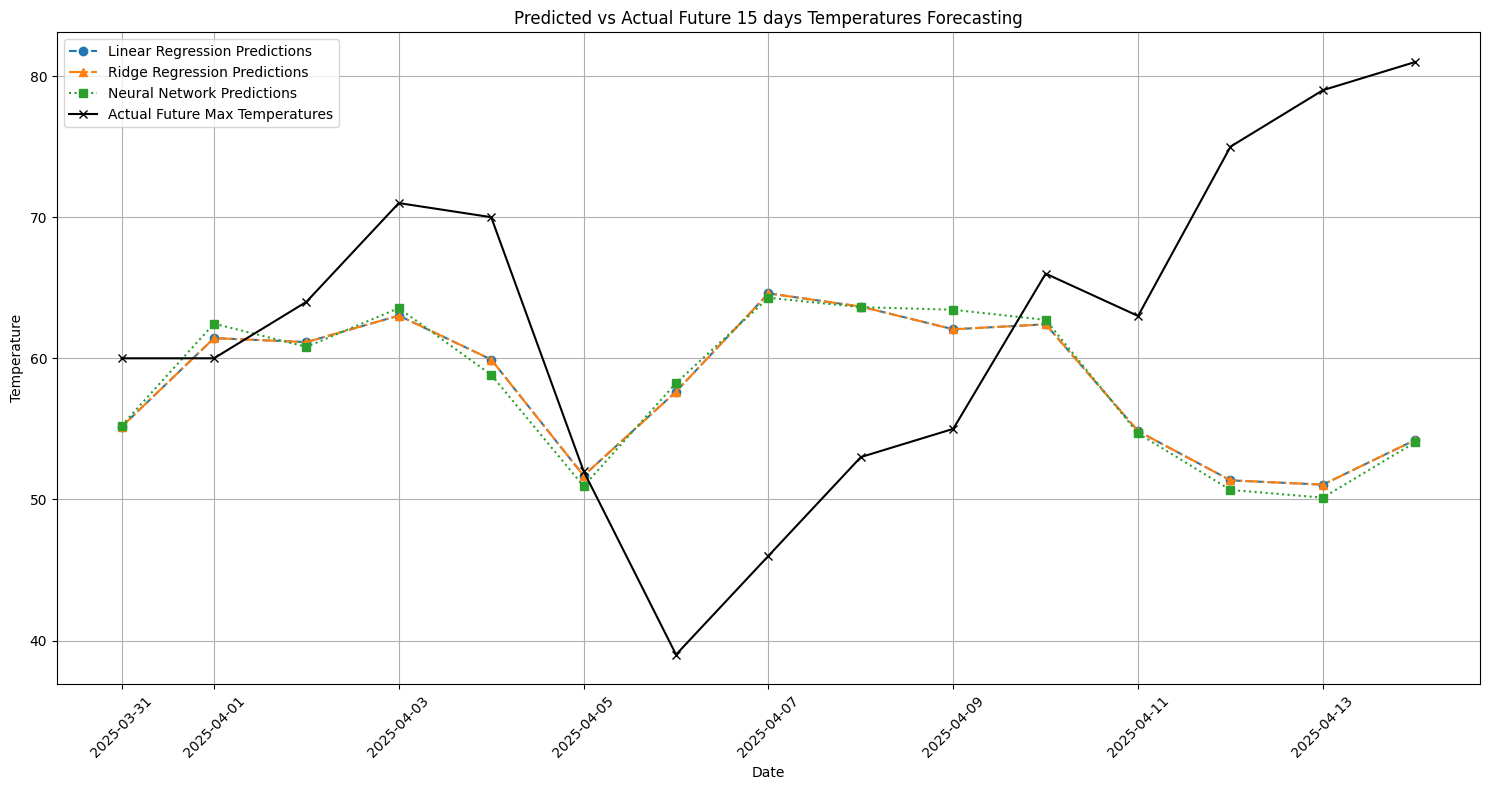

In [77]:
# Define the number of repetitions
n_repeats = 1

# Data Preparation
# Using only temperature features and excluding the target column from X
X = combined_data[['temp_max', 'temp_min']]
y = combined_data['target']

# Keep the last 15 days for testing
X_train = X.iloc[:-15]
y_train = y.iloc[:-15]
X_test = X.iloc[-15:]
y_test = y.iloc[-15:]

# Actual future temperatures for comparison
actual_future_temps = np.array([60, 60, 64, 71, 70, 52, 39, 46, 53, 55, 66, 63, 75, 79, 81, 71])  # Adjust as necessary

# Initialize metrics storage
metrics = []

for i in range(n_repeats):
    # Random state for reproducibility
    random_state = np.random.randint(10000)
    
    # Further split training data
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train_split)
    y_pred_lr = linear_model.predict(X_test_scaled)

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_scaled, y_train_split)
    y_pred_ridge = ridge_model.predict(X_test_scaled)

    # Neural Network
    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    nn_model.fit(X_train_scaled, y_train_split, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val))

    # Make predictions with each model
    future_preds_linear = linear_model.predict(X_test_scaled)
    future_preds_ridge = ridge_model.predict(X_test_scaled)
    future_preds_nn = nn_model.predict(X_test_scaled).flatten()

    # Evaluate models
    mse_lr = mean_squared_error(y_test, future_preds_linear)
    mse_ridge = mean_squared_error(y_test, future_preds_ridge)
    mse_nn = mean_squared_error(y_test, future_preds_nn)
    
    metrics.append({
        'linear': future_preds_linear,
        'ridge': future_preds_ridge,
        'nn': future_preds_nn,
        'mse_lr': mse_lr,
        'mse_ridge': mse_ridge,
        'mse_nn': mse_nn
    })

# Calculate average predictions
avg_preds = {key: np.mean([metric[key] for metric in metrics], axis=0) for key in ['linear', 'ridge', 'nn']}
avg_mse = {key: np.mean([metric[key] for metric in metrics]) for key in ['mse_lr', 'mse_ridge', 'mse_nn']}

# Plotting the results
plt.figure(figsize=(15, 8))
dates = pd.date_range(start=combined_data.index[-15], periods=15, freq='D')
plt.plot(dates, avg_preds['linear'], label='Linear Regression Predictions', marker='o', linestyle='--')
plt.plot(dates, avg_preds['ridge'], label='Ridge Regression Predictions', marker='^', linestyle='-.')
plt.plot(dates, avg_preds['nn'], label='Neural Network Predictions', marker='s', linestyle=':')
plt.plot(dates, actual_future_temps[:15], label='Actual Future Max Temperatures', color='black', marker='x', linestyle='-')
plt.title('Predicted vs Actual Future 15 days Temperatures Forecasting')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print averaged MSE for each model
#print("Average MSE - Linear: {:.2f}, Ridge: {:.2f}, NN: {:.2f}".format(avg_mse['mse_lr'], avg_mse['mse_ridge'], avg_mse['mse_nn']))
